In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as sps


dataframe_users = pd.read_csv("Data/data_target_users_test.csv", low_memory=True)
dataframe_urm=pd.read_csv("Data/data_train.csv", low_memory=True)
dataframe_items=pd.read_csv("Data/data_ICM_metadata.csv", low_memory=True)


index_id,original_id=pd.factorize(dataframe_urm["user_id"].unique())

map_original_to_index=pd.Series(index_id,index=original_id)
dataframe_urm["user_id"]=dataframe_urm["user_id"].map(map_original_to_index)

urm=sps.csr_matrix((dataframe_urm["data"].values,(dataframe_urm["user_id"].values.astype(int),dataframe_urm["item_id"].values)))
#urm_csr=sp.csr_matrix(urm)

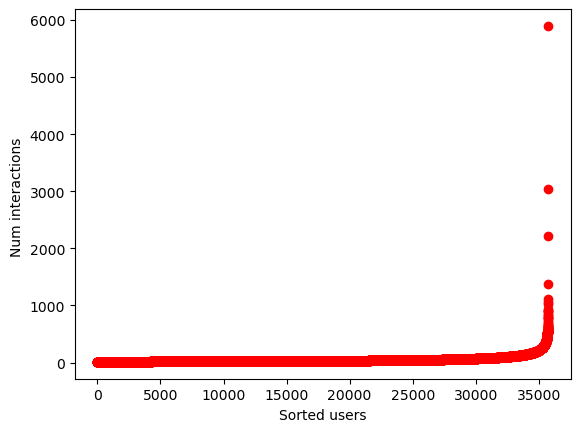

In [3]:
import matplotlib.pyplot as pyplot

urm_csr=sps.csr_matrix(urm)
n_interactions_per_user=np.ediff1d(urm_csr.indptr)
n_interactions_per_user=np.sort(n_interactions_per_user)


pyplot.plot(n_interactions_per_user, 'ro')
pyplot.ylabel('Num interactions ')
pyplot.xlabel('Sorted users')
pyplot.show()

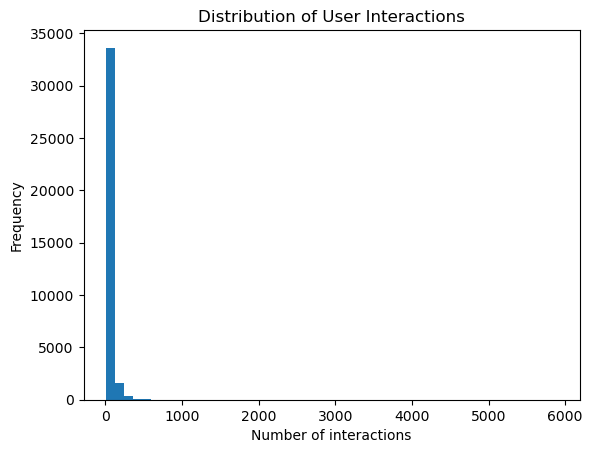

In [4]:
pyplot.hist(n_interactions_per_user, bins=50)
pyplot.xlabel("Number of interactions")
pyplot.ylabel("Frequency")
pyplot.title("Distribution of User Interactions")
pyplot.show()

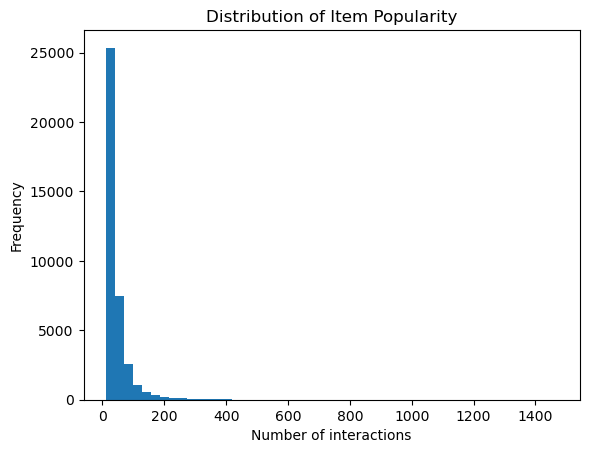

In [5]:
n_interactions_per_item = np.array(urm_csr.sum(axis=0)).flatten()
pyplot.hist(n_interactions_per_item, bins=50)
pyplot.xlabel("Number of interactions")
pyplot.ylabel("Frequency")
pyplot.title("Distribution of Item Popularity")
pyplot.show()

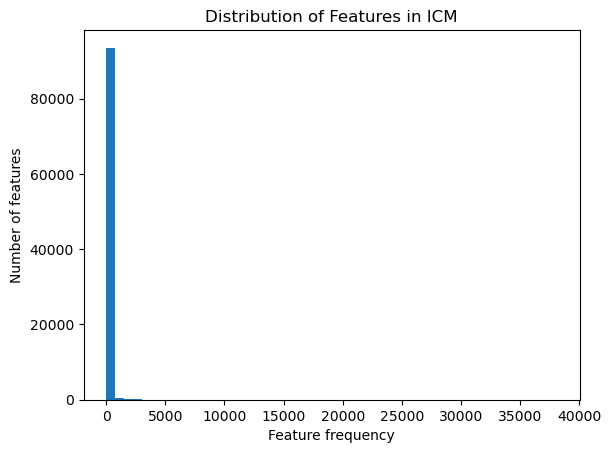

In [6]:
icm_csr = sps.csr_matrix((dataframe_items["data"].values,
                          (dataframe_items["item_id"].values, dataframe_items["feature_id"].values)))
feature_distribution = np.array(icm_csr.sum(axis=0)).flatten()
pyplot.hist(feature_distribution, bins=50)
pyplot.xlabel("Feature frequency")
pyplot.ylabel("Number of features")
pyplot.title("Distribution of Features in ICM")
pyplot.show()

In [7]:
item_popularity = np.array(urm_csr.sum(axis=0)).flatten()
icm_features = np.array(icm_csr.sum(axis=1)).flatten()
correlation = np.corrcoef(item_popularity, icm_features)[0, 1]
print(f"Correlation between item popularity and ICM features: {correlation}")

Correlation between item popularity and ICM features: 0.026039673763775396
